# Clustering using K-Means

Clustering is the process of examining a collection of “points,” and grouping the points into “clusters” according to some distance measure. The goal is that points in the same cluster have a small distance from one another, while points in different clusters are at a large distance from one another.

### Algorithm

Objective of K-Means is to minimize the Inertia or Within-Cluster-Sum-of-Squares criterion. In order words to have well separated clusters.

In [14]:
from IPython.display import Math
Math(r'\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)')

<IPython.core.display.Math object>

1. Intialize "k" centroids by some initialization process (For e.g. choose K random data points to represent the K cluster centroids)
2. Do:
    a. k clusters are created by associating every observation with its nearest centroid.
    b. Calculate the new centroid point to be the mean of observations in its cluster
3. Check for stopping criterion: 
    a. Compute the difference between the old and the new centroids
    b. If difference > threshold, go back to step 2, else stop

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

%matplotlib inline

In [3]:
# sample data to demonstrate k-means
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

In [12]:
# Run k-means on input data
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

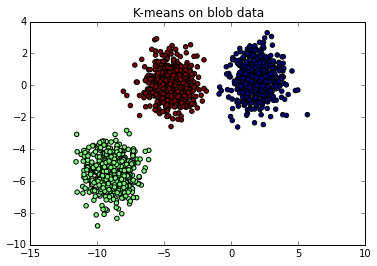

In [13]:
# plot the results
plt.subplot(111)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("K-means on blob data")

### Evaluation: Silhouette Coefficient

The Silhouette Coefficient is used to evaulate clusters, defined as follows:

a: The mean distance between a sample and all other points in the same class.
b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:

In [51]:
Math(r's = \frac{b - a}{max(a, b)}')

<IPython.core.display.Math object>

In [57]:
from sklearn import metrics

metrics.silhouette_score(X, y_pred, metric='euclidean')

0.73334234862625391

The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

The score is higher when clusters are dense and well separated

### Choice of K: Elbow Method

Plot the Sum-of-Squares error v/s number of clusters, and choose the cluster which relates to elbow point in graph.

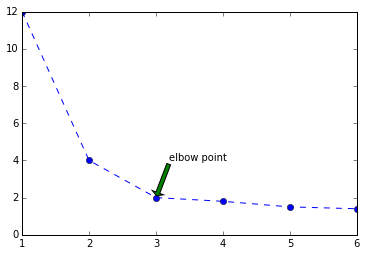

In [79]:
x = [[1,12],[2,4],[3,2],[4,1.8],[5,1.5],[6,1.4]]

s = np.array(x)

plt.plot(s[:,0], s[:,1], linestyle='--', marker='o', color='b')

plt.annotate('elbow point', xy=(3,2), xytext=(3.2,4), arrowprops=dict(facecolor='green',shrink=0.05))